In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style 

In [5]:
# read csv file

shop = pd.read_csv('data/shopify.csv')

In [6]:
# look at first 5 rows of the data
shop.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [29]:
shop.shape

(5000, 7)

In [7]:
# look for null values
shop.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [8]:
# see what type of data is there
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [9]:
# quick stats
shop.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [10]:
# check number of order id's
number_of_orders = shop['order_id'].count()

In [11]:
# date of the first transaction
shop['created_at'].min()

'2017-03-01 0:08:09'

In [12]:
# date of the last transaction
shop['created_at'].max()

'2017-03-30 9:55:00'

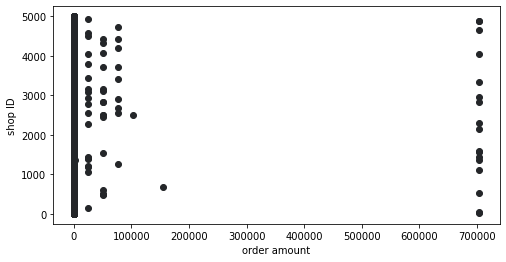

In [33]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(shop['order_amount'], shop['order_id'])
ax.set_xlabel('order amount')
ax.set_ylabel('shop ID')
plt.show()


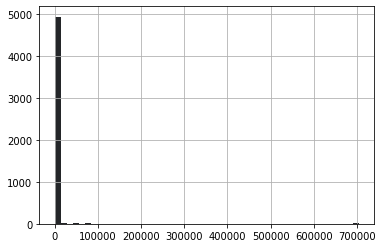

In [26]:
# plot a histrogram of the order_amount column
shop['order_amount'].hist(bins=50);

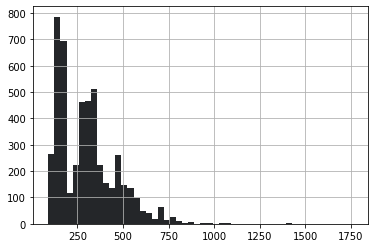

In [35]:
# plot a histogram of the order_amount without the outliers
shop[shop['order_amount'] <= 10_000 ]['order_amount'].hist(bins=50);

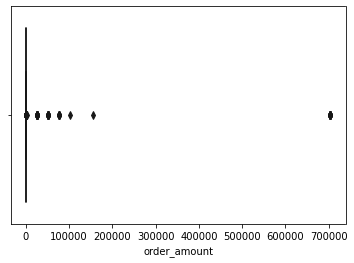

In [43]:
# draw a boxplot
sns.boxplot(x='order_amount', data=shop);

704,000 order amount looks like an outlier - see if there are a lot of similar outliers in the dataset. 

**Using z-score to Detect Outliers**

In [13]:
# function to find outliers
outliers=[]
def find_outlier(data):
    threshold=3
    mean = np.mean(data)
    st_dev =np.std(data)
    for y in data:
        z_score= (y - mean)/st_dev
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [14]:
# traverse through the data to find outliers
find_outlier(shop['order_amount'])

[704000,
 704000,
 704000,
 154350,
 704000,
 704000,
 704000,
 704000,
 704000,
 704000,
 704000,
 704000,
 704000,
 704000,
 704000,
 704000,
 704000,
 704000]

based on z-score metric, othern than 704,000 there is also 154,350 amount that looks like an outlier. 

In [70]:
# filtering transactions above 154,000 value
z_score_outlier = shop.loc[shop['order_amount'] >= 154_350]
z_score_outlier.shape

(18, 7)

In [71]:
# see order amount without transactions above 154,350
shop_without_outliers = [x for x in shop['order_amount'] if x < 154_350]

In [63]:
# see the average order amount without the outliers
np.mean(shop_without_outliers)

723.2617422721798

In [64]:
# see median order amount without outliers
np.median(shop_without_outliers)

284.0

In [66]:
# see median order amount for data as is
np.median(shop['order_amount'])

284.0

**Using Interquartile Range to Detect Outliers**

In [47]:
# using 1st and 3rd quartile approach to detect outliers
quartile_1 = shop['order_amount'].quantile(0.25)
quartile_3 = shop['order_amount'].quantile(0.75)
IQR = quartile_3-quartile_1
print(IQR)

227.0


In [54]:
lower_boundary = quartile_1 - (1.5 * IQR)
lower_boundary

-177.5

In [56]:
upper_boundary = quartile_3 + (1.5 * IQR)
upper_boundary

730.5

Based on IQR, anything above 730.5 as trade amount is an outlier

In [73]:
# filtering transactions above 730.5 order amount
iqr_outlier = shop.loc[shop['order_amount'] >= 730.5]
iqr_outlier.shape

(141, 7)